In [ ]:
%matplotlib inline


# Condensed nearest-neighbour


An illustration of the condensed nearest-neighbour method.




Using TensorFlow backend.


Automatically created module for IPython interactive environment


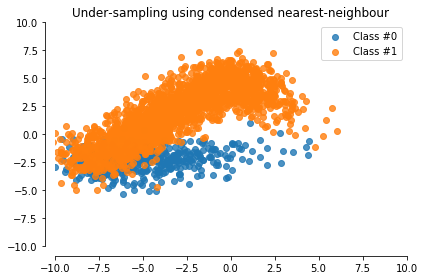

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import pandas as pd

from imblearn.under_sampling import CondensedNearestNeighbour


print(__doc__)

df = pd.read_csv("/Users/erblinberisha/Desktop/MLProject/waveform.csv")
X = df.drop(columns = ["class"])
y = df["class"].values


pca = PCA(n_components=2)


X_vis= pca.fit_transform(X)


cnn = CondensedNearestNeighbour(random_state=42)
X_resampled, y_resampled = cnn.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)



idx_class_0 = y_resampled == 0

plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

plt.title('Under-sampling using condensed nearest-neighbour')
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
X_resampled

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,-0.15,2.04,0.55,1.23,-2.10,2.56,0.52,3.36,0.80,0.34,...,2.29,0.38,2.23,-0.42,0.80,1.04,0.56,-0.55,-0.90,0.47
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,0.31,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22
2,-0.15,0.13,2.27,2.39,4.00,6.14,5.36,4.08,3.81,3.89,...,0.40,0.25,-0.78,-0.12,-0.35,0.44,0.31,-0.45,-0.23,0.27
3,-1.45,2.71,3.04,3.21,4.26,5.01,6.24,5.09,3.95,4.84,...,-0.40,-1.18,0.07,1.91,-0.15,-0.27,1.90,1.14,-0.05,0.04
4,0.15,1.01,-0.18,0.68,1.61,1.83,1.66,2.22,2.90,2.80,...,0.95,-0.44,-0.09,-1.66,-1.13,0.70,-0.12,-1.96,-0.86,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,0.95,-1.30,1.10,-1.29,1.26,1.17,1.99,3.38,3.52,7.86,...,-0.23,0.58,0.22,0.49,-0.65,-1.40,-0.15,-0.90,0.92,0.58
2409,-1.60,0.85,0.79,0.33,-0.53,1.10,3.41,2.28,4.87,6.45,...,0.34,-0.63,0.24,0.23,1.67,1.01,-0.22,-0.66,0.52,-0.03
2410,-0.83,1.04,-0.83,-0.36,-0.78,1.53,1.72,2.32,3.64,4.80,...,-0.74,-0.20,0.43,0.22,0.92,0.38,0.81,0.06,-0.61,-0.99
2411,0.83,-0.21,1.08,0.42,0.69,2.37,1.33,1.71,4.46,3.74,...,0.83,-1.12,2.14,0.27,-0.66,0.83,-1.77,0.18,1.09,-0.95


Text(0, 0.5, 'Testing Accuracy after CNN')

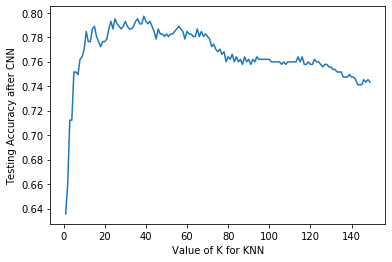

In [69]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1, stratify = y_resampled)


k_range = range(1, 150)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain, yTrain)
    y_pred = knn.predict(xTest)
    scores.append(metrics.accuracy_score(yTest, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy after CNN')

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import math
knnCV = KNeighborsClassifier(n_neighbors = 81)
predicted = cross_val_score(knnCV, X_resampled, y_resampled, cv = 9, scoring = "accuracy")


print("cv_scores mean: {}".format(np.mean(predicted)))

cv_scores mean: 0.7790878322143926


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.datasets import make_imbalance

df = pd.read_csv("/Users/erblinberisha/Desktop/MLProject/waveform.csv")
X = df.drop(columns = ["class"])
y = df["class"].values





print('Distribution before imbalancing: {}'.format(Counter(y)))

X_res, y_res = make_imbalance(X, y,
                               sampling_strategy={0: 10, 1: 20, 2: 30},
                               random_state=1)


print('Distribution after imbalancing: {}'.format(Counter(y_res)))





Distribution before imbalancing: Counter({0: 1692, 2: 1655, 1: 1653})
Distribution after imbalancing: Counter({2: 30, 1: 20, 0: 10})


In [34]:
y

array([2, 0, 1, ..., 2, 0, 0])

In [16]:
y_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X_res


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,-0.44,-0.21,0.75,3.64,5.38,5.18,6.40,5.72,1.95,4.78,...,-1.12,0.97,-0.59,-1.31,2.15,1.04,2.82,0.53,-1.64,-0.88
1,0.95,-0.49,1.45,2.38,4.55,4.87,4.54,3.97,3.40,2.82,...,0.02,1.60,-1.28,0.09,-0.43,1.68,-1.74,1.31,-0.70,-0.78
2,-0.43,1.26,0.24,-0.37,1.36,1.11,1.80,0.17,-0.77,1.09,...,0.18,1.00,-0.23,-0.13,1.41,0.69,0.73,0.01,1.11,-1.36
3,-0.23,1.53,0.61,1.95,3.04,3.81,4.62,3.81,1.85,3.50,...,-0.15,1.93,0.45,1.06,0.76,-1.48,1.61,0.26,0.10,-0.88
4,0.55,0.23,2.68,1.84,3.46,5.11,5.35,3.61,2.89,2.54,...,-1.00,2.34,-0.59,-0.84,-1.00,0.34,-0.78,0.13,0.18,-0.96
5,-0.18,0.10,0.78,0.62,1.45,0.70,1.87,-2.15,0.76,1.26,...,0.16,0.11,-0.94,2.26,-1.19,-1.19,1.05,-0.15,0.85,1.39
6,-1.31,0.41,-0.63,0.36,-0.28,-1.77,-0.47,0.52,1.10,0.97,...,-0.95,0.56,-1.33,-0.95,1.01,-1.71,-0.11,1.72,0.75,0.87
7,-0.71,-0.41,0.71,-0.78,-2.61,-0.95,-1.00,-1.47,-0.73,3.52,...,-0.03,-0.28,-0.35,-1.20,-1.26,-1.63,-0.48,0.71,-2.39,-0.07
8,0.33,1.60,2.22,3.15,3.90,4.18,7.14,4.97,2.08,2.31,...,-1.71,-1.11,-1.77,0.06,-0.97,-0.79,0.42,-1.22,0.28,0.25
9,1.01,-0.19,0.12,0.66,0.45,2.40,0.17,0.36,0.22,0.59,...,-0.35,0.08,-1.06,-0.59,0.37,-0.19,-1.06,1.85,0.61,0.19


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import math
knnCV = KNeighborsClassifier(n_neighbors = 3)
predicted = cross_val_score(knnCV, X_res, y_res, cv = 9, scoring = "accuracy")


print("cv_scores mean: {}".format(np.mean(predicted)))


cv_scores mean: 0.6957671957671958


In [27]:
X_res

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
0,-0.44,-0.21,0.75,3.64,5.38,5.18,6.40,5.72,1.95,4.78,...,-1.12,0.97,-0.59,-1.31,2.15,1.04,2.82,0.53,-1.64,-0.88
1,0.95,-0.49,1.45,2.38,4.55,4.87,4.54,3.97,3.40,2.82,...,0.02,1.60,-1.28,0.09,-0.43,1.68,-1.74,1.31,-0.70,-0.78
2,-0.43,1.26,0.24,-0.37,1.36,1.11,1.80,0.17,-0.77,1.09,...,0.18,1.00,-0.23,-0.13,1.41,0.69,0.73,0.01,1.11,-1.36
3,-0.23,1.53,0.61,1.95,3.04,3.81,4.62,3.81,1.85,3.50,...,-0.15,1.93,0.45,1.06,0.76,-1.48,1.61,0.26,0.10,-0.88
4,0.55,0.23,2.68,1.84,3.46,5.11,5.35,3.61,2.89,2.54,...,-1.00,2.34,-0.59,-0.84,-1.00,0.34,-0.78,0.13,0.18,-0.96
5,-0.18,0.10,0.78,0.62,1.45,0.70,1.87,-2.15,0.76,1.26,...,0.16,0.11,-0.94,2.26,-1.19,-1.19,1.05,-0.15,0.85,1.39
6,-1.31,0.41,-0.63,0.36,-0.28,-1.77,-0.47,0.52,1.10,0.97,...,-0.95,0.56,-1.33,-0.95,1.01,-1.71,-0.11,1.72,0.75,0.87
7,-0.71,-0.41,0.71,-0.78,-2.61,-0.95,-1.00,-1.47,-0.73,3.52,...,-0.03,-0.28,-0.35,-1.20,-1.26,-1.63,-0.48,0.71,-2.39,-0.07
8,0.33,1.60,2.22,3.15,3.90,4.18,7.14,4.97,2.08,2.31,...,-1.71,-1.11,-1.77,0.06,-0.97,-0.79,0.42,-1.22,0.28,0.25
9,1.01,-0.19,0.12,0.66,0.45,2.40,0.17,0.36,0.22,0.59,...,-0.35,0.08,-1.06,-0.59,0.37,-0.19,-1.06,1.85,0.61,0.19


Text(0, 0.5, 'Testing Accuracy after imbalanced data')

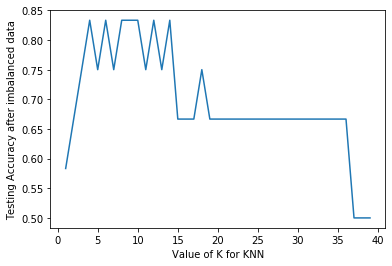

In [71]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import math

from sklearn.metrics import f1_score



k_range = range(1, 60)
scores = []
fScore0 = []
fScore1 = []
fScore2 = []


from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1, stratify = y_res)


k_range = range(1, 40)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain, yTrain)
    y_pred = knn.predict(xTest)
    scores.append(metrics.accuracy_score(yTest, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy after imbalanced data')

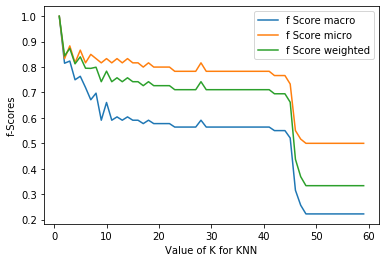

In [55]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(k_range, fScore0, label = 'f Score macro')
ax.plot(k_range, fScore1, label = 'f Score micro')
ax.plot(k_range, fScore2, label = 'f Score weighted')
plt.xlabel('Value of K for KNN')
plt.ylabel('f-Scores')
ax.legend()
plt.show()
